In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, optimizers

In [2]:
import math
import numpy as np
from glob import glob
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

In [3]:
IMG_CHANNELS = 3
IMG_ROWS = 64
IMG_COLS = 64
CLASSES = 2

In [4]:
#define the convnet 
def build(input_shape, classes):
    model = models.Sequential() 
    model.add(layers.Convolution2D(32, (3, 3), activation='relu',
                        input_shape=input_shape))
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))

    model.add(layers.Flatten())
    model.add(layers.Dense(32, activation='relu'))
    model.add(layers.Dense(classes, activation='softmax'))
    return model

In [8]:
images = [image.load_img(p, target_size=(IMG_ROWS, IMG_COLS))
          for p in glob('cats_dogs/cats/*jpg') + glob('cats_dogs/dogs/*jpg')]
image_vector = np.asarray([image.img_to_array(img) for img in images])

In [9]:
image_vector.shape

(2000, 64, 64, 3)

In [10]:
image_vector[0].shape

(64, 64, 3)

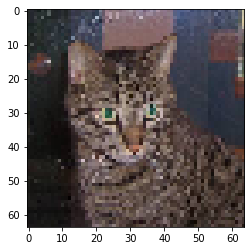

In [11]:
plt.imshow(image_vector[0]/255)

In [12]:
y=[1] * 1000 + [0] * 1000

In [11]:
y

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,


In [13]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(image_vector, y, test_size=0.20, random_state=0)

In [14]:
X_train.shape

(1600, 64, 64, 3)

In [15]:
X_train, X_test = X_train / 255, X_test / 255
# convert to categorical
# convert class vectors to binary class matrices
y_train = tf.keras.utils.to_categorical(y_train, 2)
y_test = tf.keras.utils.to_categorical(y_test, 2)

In [16]:
y_test[0]

array([0., 1.], dtype=float32)

In [17]:
model=build((IMG_ROWS, IMG_COLS, IMG_CHANNELS), CLASSES)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 30752)             0         
                                                                 
 dense (Dense)               (None, 32)                984096    
                                                                 
 dense_1 (Dense)             (None, 2)                 66        
                                                                 
Total params: 985,058
Trainable params: 985,058
Non-trainable params: 0
__________________________________________________

In [18]:
model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(learning_rate=0.001), metrics=['accuracy'])
 
history = model.fit(X_train, y_train, batch_size=128, epochs=50, validation_split=0.1) 

Epoch 1/50
12/12 [==============================] - 2s 143ms/step - loss: 1.4266 - accuracy: 0.4917 - val_loss: 0.6712 - val_accuracy: 0.6125
Epoch 2/50
12/12 [==============================] - 2s 126ms/step - loss: 0.6842 - accuracy: 0.5604 - val_loss: 0.6406 - val_accuracy: 0.6687
Epoch 3/50
12/12 [==============================] - 1s 124ms/step - loss: 0.6726 - accuracy: 0.6146 - val_loss: 0.7712 - val_accuracy: 0.4313
Epoch 4/50
12/12 [==============================] - 2s 126ms/step - loss: 0.6083 - accuracy: 0.6771 - val_loss: 0.7197 - val_accuracy: 0.4437
Epoch 5/50
12/12 [==============================] - 2s 128ms/step - loss: 0.5960 - accuracy: 0.6889 - val_loss: 0.6167 - val_accuracy: 0.6938
Epoch 6/50
12/12 [==============================] - 1s 123ms/step - loss: 0.5625 - accuracy: 0.7278 - val_loss: 0.6172 - val_accuracy: 0.6938
Epoch 7/50
12/12 [==============================] - 1s 124ms/step - loss: 0.5159 - accuracy: 0.7917 - val_loss: 0.5919 - val_accuracy: 0.7188
Epoch 

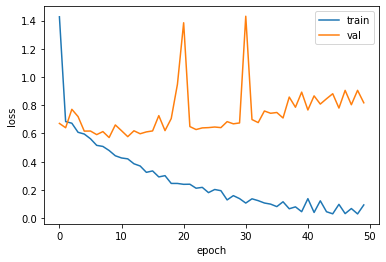

In [19]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

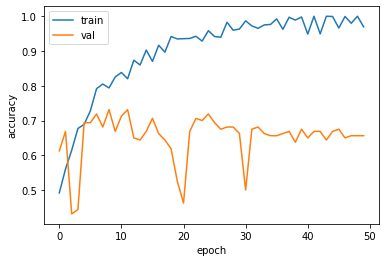

In [20]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','val'])
plt.show()

In [21]:
score = model.evaluate(X_test, y_test)
print("\nTest loss:", score[0])
print('Test accuracy:', score[1])

13/13 [==============================] - 0s 10ms/step - loss: 0.7579 - accuracy: 0.6850

Test loss: 0.7578719854354858
Test accuracy: 0.6850000023841858
